In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('small_spam_dataset.csv')

In [3]:
df.sample(10)

,text,spam
293,Subject: you have successfully added a new ema...,1
421,"Subject: from mrs fati dear , i crave your i...",1
488,Subject: re : joao neves thank you vince . i ...,0
87,Subject: enhance your anatomy i ' ve been usi...,1
327,Subject: re : project tracking database access...,0
330,Subject: earth day - trash bash i hardly know...,0
336,Subject: save your money buy getting this thin...,1
145,Subject: neugierig ? - - - - 870879228701464 ...,1
102,Subject: trading limit and policy changes vin...,0
67,Subject: your job application to enron researc...,0


In [4]:
df.head()

,text,spam
0,Subject: wait too long and . . . 1147 secretl...,1
1,Subject: re : visual numerics cnl licensing is...,0
2,Subject: you don _ t know how to get into sear...,1
3,"Subject: re : contact vince , david ' s pare...",0
4,Subject: assume i will not be chairing . . . ...,0


In [5]:
df.tail()

,text,spam
495,Subject: proposal submission francois and ken...,0
496,Subject: winning one of our chopard and feel t...,1
497,Subject: your next investment should be this s...,1
498,"Subject: perfect logo charset = koi 8 - r "" > ...",1
499,Subject: re : f / u to dr . kaminski @ enron f...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   spam    500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


DATA CLEANING


In [7]:
#missing value
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df=df.drop_duplicates(keep='first')

In [11]:
df.shape

(499, 2)

EDA

In [12]:
df.head()

,text,spam
0,Subject: wait too long and . . . 1147 secretl...,1
1,Subject: re : visual numerics cnl licensing is...,0
2,Subject: you don _ t know how to get into sear...,1
3,"Subject: re : contact vince , david ' s pare...",0
4,Subject: assume i will not be chairing . . . ...,0


In [13]:
df.value_counts()

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [14]:
df['text'].value_counts()

text
Subject: wait too long and . . . 1147  secretly  attract women or men  add some spice to your life  secretlyattract  women or men  delete                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [15]:
df['spam'].value_counts()


spam
1    250
0    249
Name: count, dtype: int64

In [16]:
df['spam'].replace({0: 'spam', 1: 'ham'})
df['spam'].value_counts()


spam
1    250
0    249
Name: count, dtype: int64

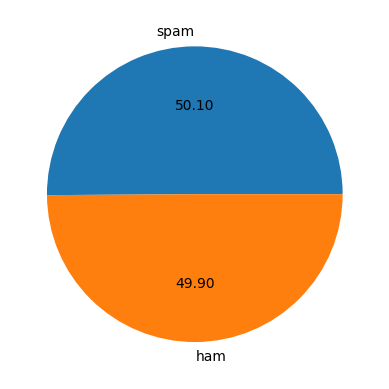

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(),labels=['spam', 'ham'],autopct="%0.2f")
plt.show()

In [18]:
#almost 24 email is spam so dta is imbalance

In [19]:
import nltk  #natural lang tool kit

In [20]:
!pip install nltk

In [21]:
#df.head()

In [22]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df['num_characters'] =df['text'].apply(len)


In [24]:
df.head()

,text,spam,num_characters
0,Subject: wait too long and . . . 1147 secretl...,1,138
1,Subject: re : visual numerics cnl licensing is...,0,3758
2,Subject: you don _ t know how to get into sear...,1,908
3,"Subject: re : contact vince , david ' s pare...",0,218
4,Subject: assume i will not be chairing . . . ...,0,1496


In [25]:
df['text'].apply(lambda x: len(str(x).split()))

0       25
1      797
2      233
3       52
4      363
      ... 
495    354
496    213
497    819
498    207
499    385
Name: text, Length: 499, dtype: int64

In [26]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [27]:
df.head()

,text,spam,num_characters,num_words
0,Subject: wait too long and . . . 1147 secretl...,1,138,26
1,Subject: re : visual numerics cnl licensing is...,0,3758,798
2,Subject: you don _ t know how to get into sear...,1,908,234
3,"Subject: re : contact vince , david ' s pare...",0,218,53
4,Subject: assume i will not be chairing . . . ...,0,1496,364


In [28]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0      [Subject, :, wait, too, long, and, ., ., ., 11...
1      [Subject, :, re, :, visual, numerics, cnl, lic...
2      [Subject, :, you, don, _, t, know, how, to, ge...
3      [Subject, :, re, :, contact, vince, ,, david, ...
4      [Subject, :, assume, i, will, not, be, chairin...
                             ...                        
495    [Subject, :, proposal, submission, francois, a...
496    [Subject, :, winning, one, of, our, chopard, a...
497    [Subject, :, your, next, investment, should, b...
498    [Subject, :, perfect, logo, charset, =, koi, 8...
499    [Subject, :, re, :, f, /, u, to, dr, ., kamins...
Name: text, Length: 499, dtype: object

In [29]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  # for words

0       26
1      798
2      234
3       53
4      364
      ... 
495    355
496    214
497    820
498    208
499    386
Name: text, Length: 499, dtype: int64

In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,text,spam,num_characters,num_words,num_sentences
0,Subject: wait too long and . . . 1147 secretl...,1,138,26,4
1,Subject: re : visual numerics cnl licensing is...,0,3758,798,49
2,Subject: you don _ t know how to get into sear...,1,908,234,11
3,"Subject: re : contact vince , david ' s pare...",0,218,53,4
4,Subject: assume i will not be chairing . . . ...,0,1496,364,20


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,499.000000,499.000000,499.000000
mean,1564.971944,322.503006,19.304609
std,2322.699013,450.622547,23.633909
min,46.000000,7.000000,1.000000
25%,467.500000,94.000000,7.000000
50%,904.000000,198.000000,12.000000
75%,1697.000000,381.000000,20.000000
max,27965.000000,5691.000000,204.000000


In [33]:
#ham messages column 
df[df['spam'] == 0][['num_characters','num_words','num_sentences']].describe()  


,num_characters,num_words,num_sentences
count,249.000000,249.000000,249.000000
mean,1818.116466,382.791165,20.927711
std,2314.882000,462.788964,21.691449
min,91.000000,19.000000,1.000000
25%,661.000000,136.000000,8.000000
50%,1256.000000,275.000000,14.000000
75%,2134.000000,452.000000,24.000000
max,27965.000000,5691.000000,156.000000


In [34]:
#spam messages
df[df['spam'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,250.000000,250.000000,250.00000
mean,1312.840000,262.456000,17.68800
std,2307.551855,430.758731,25.36209
min,46.000000,7.000000,1.00000
25%,379.250000,80.000000,7.00000
50%,651.500000,131.500000,10.00000
75%,1072.750000,234.000000,18.00000
max,18999.000000,3363.000000,204.00000


In [35]:
import seaborn as sns

In [36]:
!pip install seaborn

C:\Users\Dell\AppData\Local\Temp\ipykernel_6832\1060408536.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


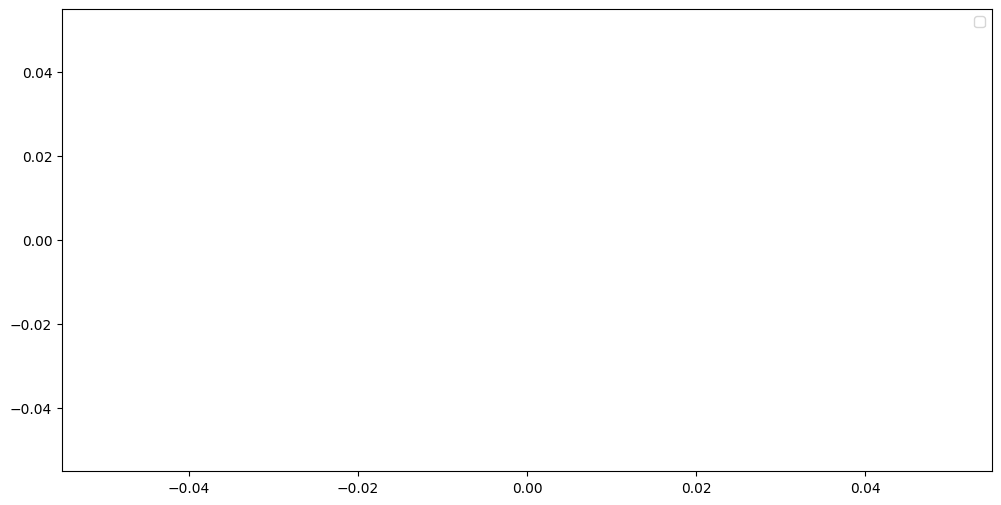

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['spam'] == 'ham']['num_words'], label='Ham' ) 
sns.histplot(df[df['spam'] == 'spam']['num_words'], color='yellow' ,label='Spam')
plt.legend()
#plt.xlabel('Number of Words')
#plt.ylabel('Count')
#plt.title('Distribution of Word Count in Ham vs Spam Messages')
#plt.show()


<Axes: >

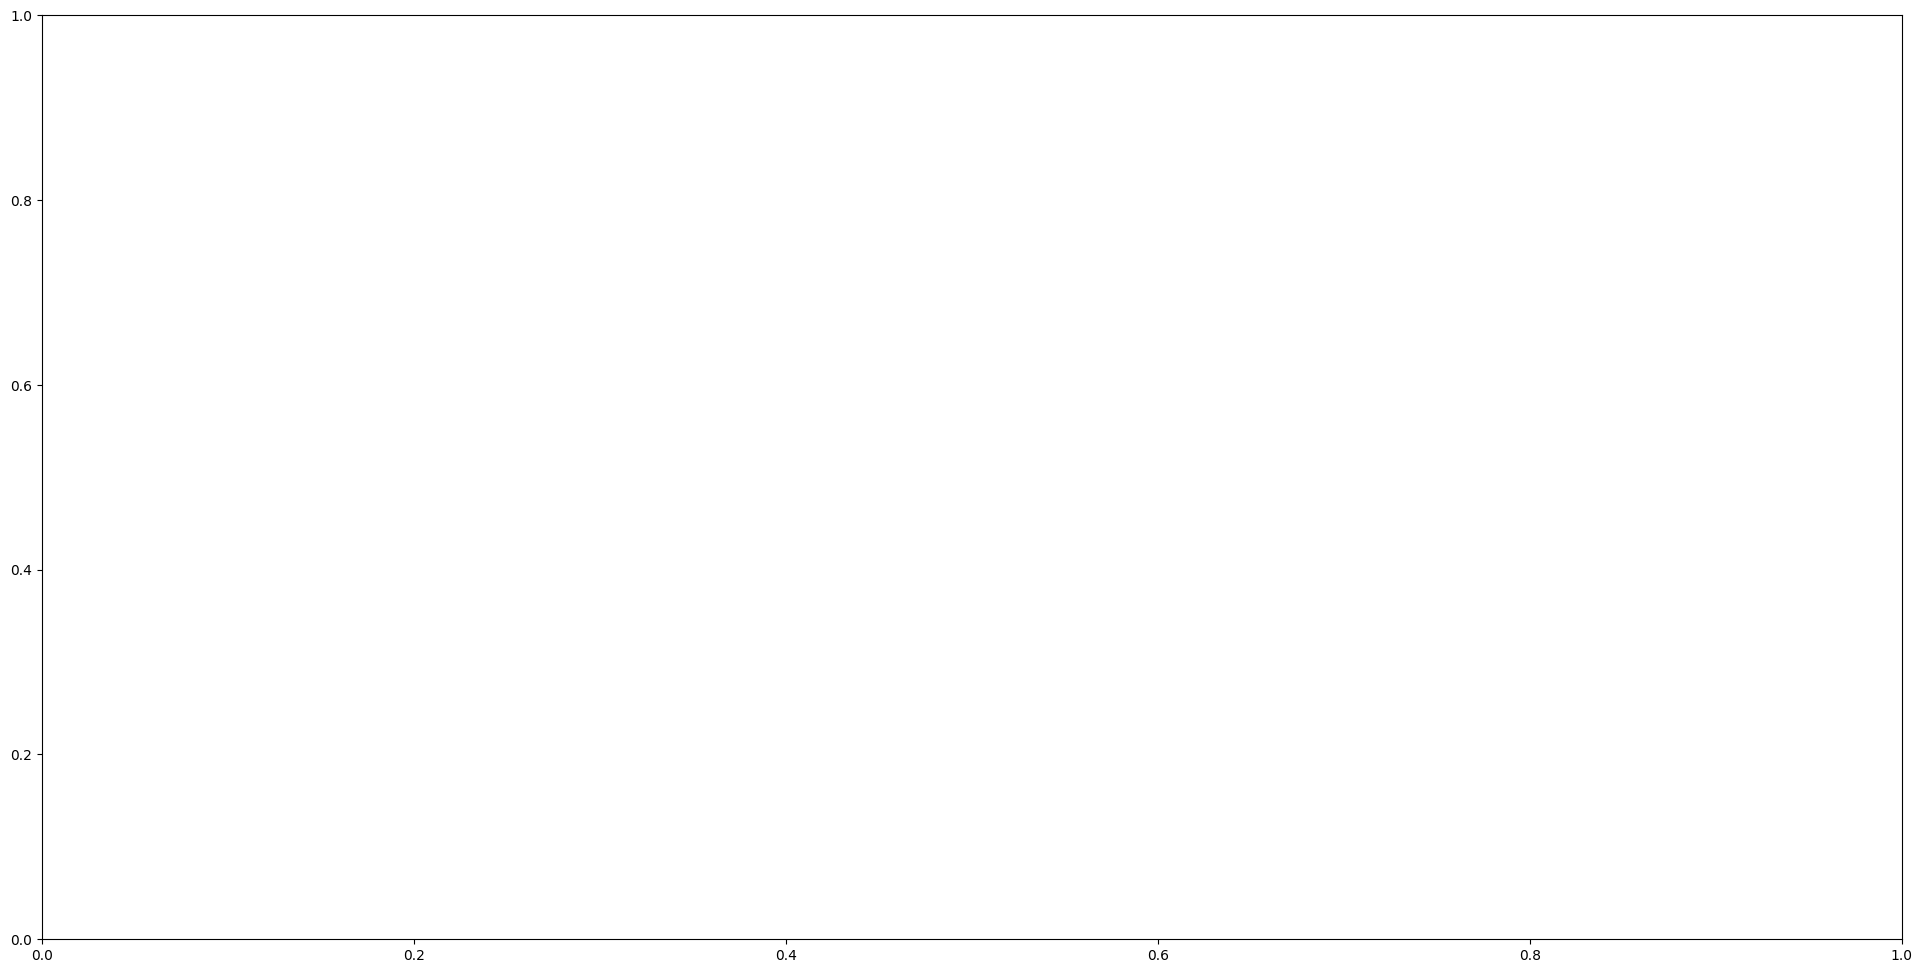

In [38]:
plt.figure(figsize=(24,12))
sns.histplot(df[df['spam'] == 'ham ']['num_sentences'],color="red",label="ham")
sns.histplot(df[df['spam'] == 'spam']['num_sentences'],color='yellow' , label="spam" )

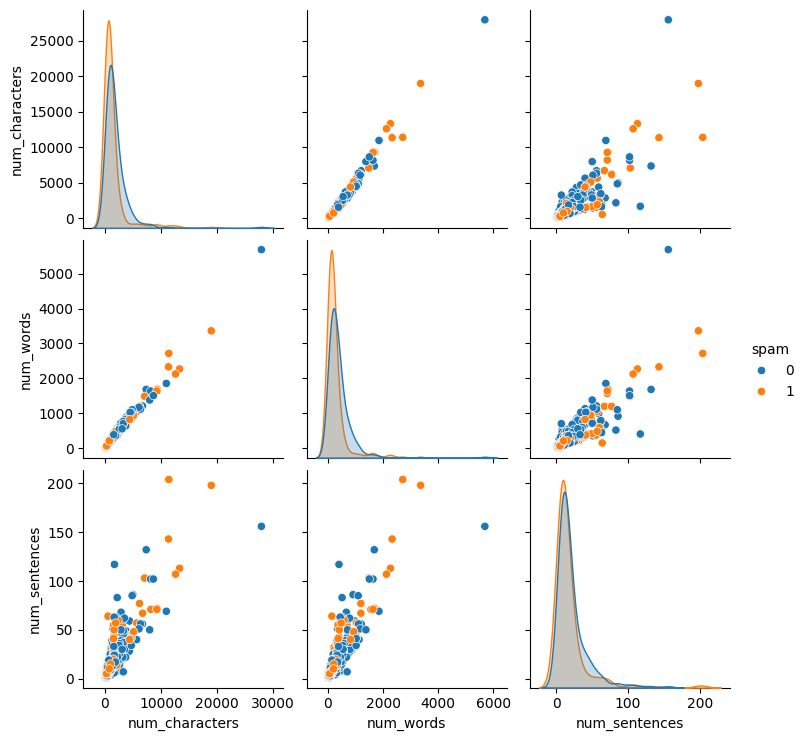

In [39]:
#relation bw no of words and sentences

sns.pairplot(df,hue='spam')

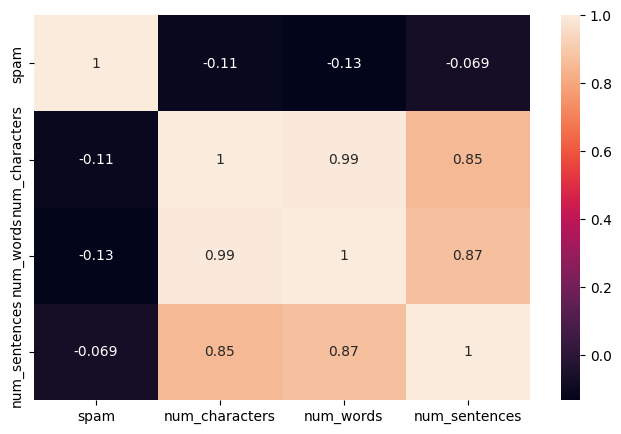

In [40]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, )
plt.show()


DATA PROCESSING KRENGE
lower case,tokenization,special char removal,

In [41]:
def transform_text(text):  #text provide krenge
    text = text.lower()     #lower case me convert krega
    return text

In [42]:
transform_text('Hi how are you' )

'hi how are you'

In [43]:
def transform_text(text):  #text provide krenge
    text = text.upper()     #lower case me convert krega
    return text

In [44]:
transform_text('Hi how are you' )

'HI HOW ARE YOU'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)  #tokenization
    
    return text

In [46]:
transform_text('Hi how are you' )

['hi', 'how', 'are', 'you']

In [47]:
df['text'][100]   #removing special characters upto 100 texts 

'Subject: re : times 2 filing units  pat : out co # is 0413 , rc # is 107043 . please deliver them to eb 19 c 2 .  also , please let me know when they are going to be delivered as we have to  unload the lateral file cabinets that are currently in that room . will the  men who deliver the times 2 units remove the lateral files ? thanks . anita'

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #tokenization
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)   #append krega 
    return y

In [49]:
transform_text("I'm 90%%% gonna be home soon and i don't want to talk ")

['i',
 '90',
 'gon',
 'na',
 'be',
 'home',
 'soon',
 'and',
 'i',
 'do',
 'want',
 'to',
 'talk']

In [50]:
transform_text('Hi how are you Subject: re : doctor approved pill lgw  a man endowed with a 7 - 8 " hammer is simply  better equipped than a man with a 5 - 6 " hammer .' )

['hi',
 'how',
 'are',
 'you',
 'subject',
 're',
 'doctor',
 'approved',
 'pill',
 'lgw',
 'a',
 'man',
 'endowed',
 'with',
 'a',
 '7',
 '8',
 'hammer',
 'is',
 'simply',
 'better',
 'equipped',
 'than',
 'a',
 'man',
 'with',
 'a',
 '5',
 '6',
 'hammer']

In [51]:
import nltk
nltk.download('stopwords')   # sentence ke meaning me koi imp nhi hota h formation me hpta j


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
from nltk.corpus import stopwords
stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) #tokenization
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)   #append krega 


    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return y

In [54]:
import string 

In [55]:
transform_text('Hi! how are you RASHMI are you studing ML? ' )

['hi', 'rashmi', 'studing', 'ml']

In [56]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')
ps.stem('dancing')  #word ko root form me lata h

'danc'

In [57]:
transform_text('Hi! how are you RASHMI are you studing ML? ' )

['hi', 'rashmi', 'studing', 'ml']

In [58]:
transform_text("Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . ")

['subject',
 'las',
 'vegas',
 'high',
 'rise',
 'boom',
 'las',
 'vegas',
 'fast',
 'becoming',
 'major',
 'metropolitan',
 'city',
 '60',
 'new',
 'high',
 'rise',
 'towers',
 'expected',
 'built',
 'around',
 'las',
 'vegas',
 'strip',
 'within',
 'next',
 '3',
 '4',
 'years',
 '30',
 '000',
 'condominiums',
 'boom',
 'begun',
 'buy',
 'first',
 'early',
 'phase',
 'pre',
 'construction',
 'pricing',
 'available',
 'las',
 'vegas',
 'high',
 'rises',
 'including',
 'trump',
 'cosmopolitan',
 'mgm',
 'turnberry',
 'icon',
 'sky',
 'among',
 'others',
 'join',
 'interest',
 'list',
 'http',
 'www',
 'verticallv',
 'com',
 'message',
 'sent',
 'realty',
 'one',
 'highrise',
 'learn',
 'www',
 'verticallv',
 'comif',
 'wish',
 'excluded',
 'future',
 'mailings',
 'please',
 'reply',
 'word',
 'remove',
 'subject',
 'line']

In [59]:
df['text'][10]

'Subject: re : houston visit  soussan ,  it seems we have planned for all contingencies .  look forward to meeting you next week .  vince  " faiz , soussan " on 11 / 28 / 2000 06 : 51 : 51 pm  to : " \' vince . j . kaminski @ enron . com \' "  cc :  subject : re : houston visit  vince ,  your suggested arrangement is perfect with me and i love both italian or  steak . . . the choice is yours . i really look forward to our meeting vkaminski @ aol . com  subject : re : houston visit  soussan ,  let \' s meet at westin oaks next to the reception around 6 : 30 p . m . thursday .  there are several nice restaurants within a walking distance to the  galleria .  i shall make a reservation ( is italian or a steakhouse ok ? ) .  you can reach me on thursday at my cell phone 713 410 5396 .  look forward to meeting you .  vince  " faiz , soussan " on 11 / 27 / 2000 04 : 37 : 30 pm  to : " \' vince . j . kaminski @ enron . com \' "  cc :  subject : re : houston visit  great ! i look forward to our

In [60]:
df['text'].apply(transform_text)


0      [subject, wait, long, 1147, secretly, attract,...
1      [subject, visual, numerics, cnl, licensing, is...
2      [subject, know, get, search, engine, results, ...
3      [subject, contact, vince, david, parents, comi...
4      [subject, assume, chairing, dear, joel, receiv...
                             ...                        
495    [subject, proposal, submission, francois, kent...
496    [subject, winning, one, chopard, feel, triumph...
497    [subject, next, investment, sto, ck, pop, 3, m...
498    [subject, perfect, logo, charset, koi, 8, r, t...
499    [subject, f, u, dr, kaminski, enron, iris, mac...
Name: text, Length: 499, dtype: object

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
import wordcloud 

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))


In [ ]:
spam_wc = wc.generate(df[df['spam'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))

plt.title("HAM Messages WordCloud", fontsize=35)
plt.imshow(spam_wc)


#actally ham at 1

In [ ]:
spam_wc = wc.generate(df[df['spam'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

plt.title("SPAM Messages WordCloud", fontsize=35)

#at 0 it is actually spam

In [ ]:
df.head()

infinite sentence showing 


In [ ]:
!pip install Counter

In [ ]:
ham_corpus = []  #initially is 1
for messages in df[df['spam'] == 1]['transformed_text'].tolist():
    for words in messages.split():
        ham_corpus.append(words)

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
word_count = Counter(ham_corpus).most_common(30)  #top 30 word ko count kreg

df_wc = pd.DataFrame(word_count, columns=['Word', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Count', data=df_wc)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

In [ ]:
from collections import Counter
df_top30 = pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.figure(figsize=(12,6))
sns.barplot(x=df_top30[0], y=df_top30[1])
plt.xlabel("0")  # label x-axis as 0
plt.ylabel("1")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()

In [ ]:
spam_corpus = []
for messages in df[df['spam'] == 0]['transformed_text'].tolist():
    for words in messages.split():
        spam_corpus.append(words)




In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
word_count = Counter(spam_corpus).most_common(30)  #top 30 word ko count kreg

df_wc = pd.DataFrame(word_count, columns=['Word', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Count', data=df_wc)
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [ ]:
from collections import Counter
df_top30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
plt.figure(figsize=(12,6))
sns.barplot(x=df_top30[0], y=df_top30[1])
plt.xlabel("0")  # label x-axis as 0
plt.ylabel("1")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.head()


MODEL BUILDING

by naive bayes


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:

X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape   #5695=MESSAGE, 37158=WORDS

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['spam'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)  #gaussian naive bayes
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)  #multinomial naive bayes
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)  #bernoulii
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):  # training aur testing data devrhe h
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)  #accuracy and precision

precission materrs along with accuracy


In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision) 

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))